# Actividad - Ecuaciones diferenciales

### Luis Eduardo Jiménez del Muro - 09/11/2023

1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [5]:
from scipy.integrate import solve_ivp, odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
def f(t, x):
    return x/(t + 1)

x0 = np.array([0])
tspan = [0, 20]

x = solve_ivp(f, tspan, x0, max_step=0.1)
x

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-06 ...  1.991e+01  2.000e+01]
        y: [[ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 1232
     njev: 0
      nlu: 0

Grafique con condición inicial $x_0 = 2$

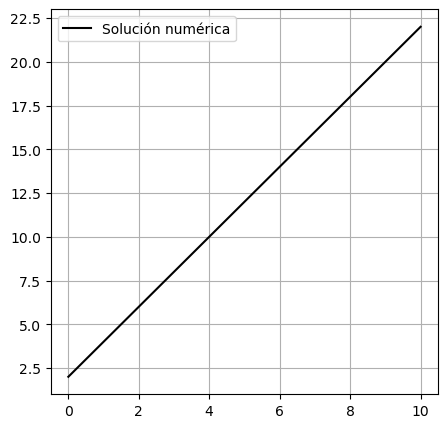

In [45]:
x0 = np.array([2])
tspan = [0, 10]

x = solve_ivp(f, tspan, x0, max_step=0.1)

plt.figure(figsize=(5, 5))
plt.plot(x.t, x.y[0, :], label="Solución numérica", c="k")
plt.grid()
plt.legend(loc="best")

2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [85]:
x0 = np.array([0.5, 0.1])

w0 = 3

def oscilador(t, X):
    x = X[0]
    dx = X[1]
    d2x = -w0**2 * x
    return [dx, d2x]

tspan = [0, 10]

x = solve_ivp(oscilador, tspan, x0, max_step=0.1)
x


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.155e-02 ...  9.932e+00  1.000e+01]
        y: [[ 5.000e-01  5.009e-01 ... -5.851e-02  4.420e-02]
            [ 1.000e-01 -4.222e-02 ...  1.493e+00  1.497e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 608
     njev: 0
      nlu: 0

Grafique

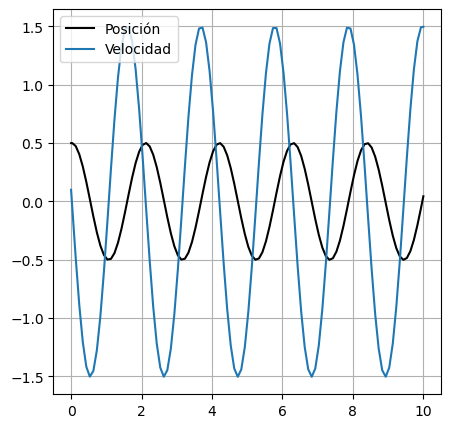

In [86]:
plt.figure(figsize=(5, 5))
plt.plot(x.t, x.y[0, :], label="Posición", c="k")
plt.plot(x.t, x.y[1, :], label="Velocidad")
plt.grid()
plt.legend(loc="best")

Asigne a los parámetros de la solución analítica $C_1=x_0$ y $C_2=\frac{\dot{x}_0}{\omega_0}$.

In [87]:
def posicion(t, w0, x0, v0):
    return x0 * np.cos(w0 * t) + (v0/w0) * np.sin(w0 * t)

def velocidad(t, w0, x0, v0):
    return w0 * (-x0 * np.sin(w0*t) + (v0/w0) * np.cos(w0 * t))

Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.

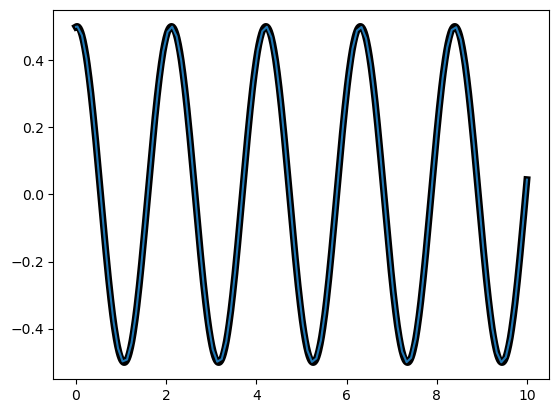

In [88]:
w0 = 3
x0 = 0.5
v0 = 0.1

t = np.linspace(0, 10, 1000)

pos = posicion(t, w0, x0, v0)
vel = velocidad(t, w0, x0, v0)

plt.plot(t, posicion(t, w0, x0, v0), label = "Posición 1", c="k", lw=5)
plt.plot(x.t, x.y[0, :], label="Posición 2")